1. Load Your Excel Data

In [1]:
import pandas as pd

df = pd.read_excel('clustering_results.xlsx')

In [2]:
features = ['# Words', '# Sentences', '# Pools', '# Lanes', '# Data Objects',
            '# Decision Points', '# Parallel', '# Loops',  'Depth']

Cluster
0    22
1    14
2    13
3     4
Name: count, dtype: int64


C:\Users\Aya Saafan\AppData\Local\Temp\ipykernel_5736\163623044.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


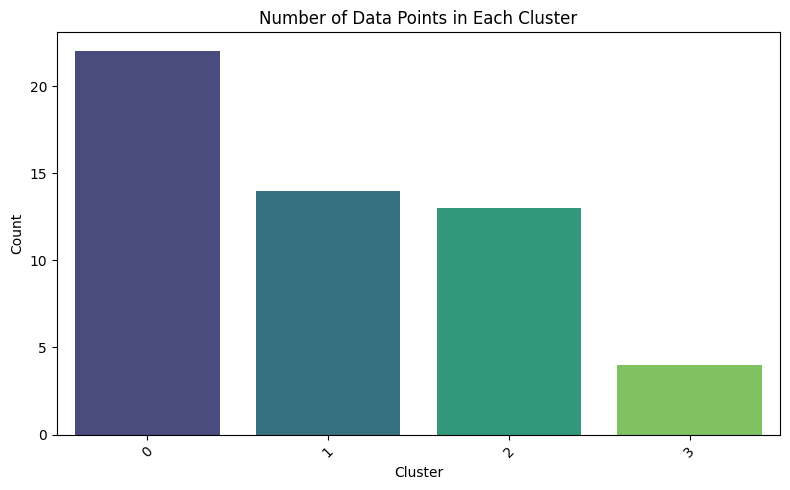

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of samples in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print(df['Cluster'].value_counts())

# Plot using matplotlib
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Number of Data Points in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)


            # Words  # Sentences   # Pools   # Lanes  # Data Objects  \
Cluster                                                                
0         80.227273     5.136364  1.409091  2.136364        2.409091   
1        150.071429     9.642857  1.357143  1.642857        4.428571   
2        175.076923    11.692308  2.461538  3.307692        5.461538   
3        681.500000    37.000000  3.250000  3.500000        6.000000   

         # Decision Points  # Parallel   # Loops     Depth  
Cluster                                                     
0                 0.681818    0.363636  0.181818  1.090909  
1                 1.714286    1.000000  0.928571  2.071429  
2                 1.923077    0.230769  0.384615  1.615385  
3                 3.500000    0.750000  0.500000  1.750000  


Even though clustering is unsupervised, we can use Random Forest to estimate which features best separate the clusters:

# Words              0.180043
# Sentences          0.264169
# Pools              0.124047
# Lanes              0.122381
# Data Objects       0.086284
# Decision Points    0.062961
# Parallel           0.054971
# Loops              0.036019
Depth                0.069126
dtype: float64


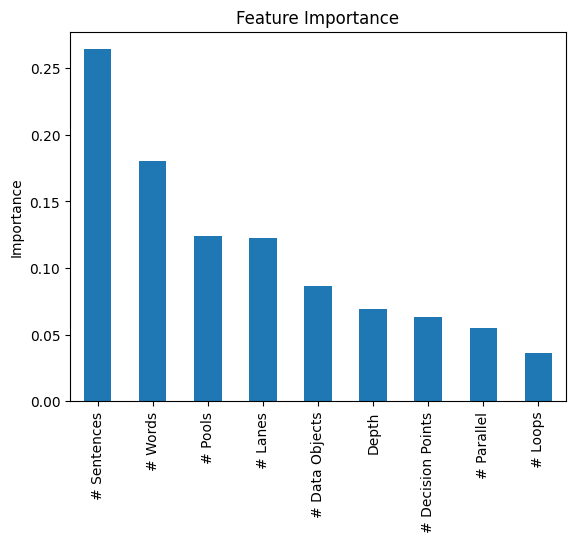

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Filter out Cluster 3
df_filtered = df[df['Cluster'] != 3]

# Features and target
X = df_filtered[features]
y = df_filtered['Cluster']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

# Feature importances
importances = pd.Series(rf.feature_importances_, index=features)
print(importances)

# Plot
importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.ylabel('Importance')
plt.show()
